In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt


In [2]:
dataset= pd.read_csv('student_scores.csv')

In [3]:
print(dataset.shape)
dataset.head()

(25, 2)


,Hours,Scores
0,2.5,21
1,5.1,47
2,3.2,27
3,8.5,75
4,3.5,30


In [5]:
dataset.describe() # checking for outliers

,Hours,Scores
count,25.000000,25.000000
mean,5.012000,51.480000
std,2.525094,25.286887
min,1.100000,17.000000
25%,2.700000,30.000000
50%,4.800000,47.000000
75%,7.400000,75.000000
max,9.200000,95.000000


In [8]:
# to check for outliers use IQR
dataset.Hours.quantile(0.75) #q3

7.4

In [10]:
iqr = dataset.Hours.quantile(0.75) - dataset.Hours.quantile(0.25) # iqr = q3-q1
upper_threshold = dataset.Hours.quantile(0.75) + (1.5 * iqr) # ut = q3 +(1.5*iqr)
lower_threshold = dataset.Hours.quantile(0.25) - (1.5 * iqr) # lt = q1 -(1.5*iqr)
#lower_threshold # no outliers
upper_threshold # no outliers

14.450000000000001

In [11]:
# check for null values
dataset.isnull().sum()

Hours     0
Scores    0
dtype: int64

In [14]:
# check for duplicates
dataset = dataset.drop_duplicates() # drop duplicates
dataset.shape

(25, 2)

In [15]:
# check for right data type
dataset.dtypes

Hours     float64
Scores      int64
dtype: object

In [16]:
# data is structured and data is clean

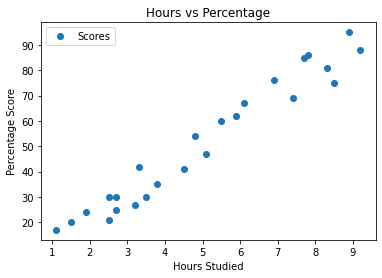

In [17]:
dataset.plot(x='Hours', y='Scores', style='o') #feature vs target
plt.title('Hours vs Percentage')
plt.xlabel('Hours Studied')
plt.ylabel('Percentage Score')
plt.show()
# there is a linear relationship b/t feature and target variables (score inc with hrs inc)
# 1) Is there any relationship between the feature and target - Yes 
# 2) Is there any linear relationship between the feature and target - Yes 
# 3) No transformation is required

In [18]:
# we can use correlation too
dataset.corr()

,Hours,Scores
Hours,1.000000,0.976191
Scores,0.976191,1.000000


There is a linear relationship between hours and score => we can go ahead and develop a linear regression model. No transformation required.

In [19]:
dataset.Scores.values

array([21, 47, 27, 75, 30, 20, 88, 60, 81, 25, 85, 62, 41, 42, 17, 95, 30,
       24, 67, 69, 30, 54, 35, 76, 86])

In [23]:
# Preparing the data
# Splitting (train and test)
X = dataset.loc[:, ['Hours']].values # select all rows and select all columns except the last column as my feature
y = dataset.loc[:, 'Scores'].values # target as arrays

from sklearn.model_selection import train_test_split #import the required function
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state = 85)


In [24]:
y_test

array([20, 35, 76, 17, 67, 69, 21, 86])

In [25]:
X_train.shape, X_test.shape 

((17, 1), (8, 1))

In [ ]:
# Scaling not madatory for LR.
# LR without scaling

In [39]:
# Normalisation or standardasation (scaling the data)
# from sklearn.preprocessing import StandardScaler # importing the required function
# scaler = StandardScaler() #initialis
# scaler.fit(X_train) # find the values of mu and sigma
# X_train = scaler.transform(X_train)
# X_test = scaler.transform(X_test) #only transform the test dataset, dont fit it

In [ ]:
# Modeling

In [27]:
from sklearn.linear_model import LinearRegression #importing all the required functions
regressor = LinearRegression() # spredicted score = m * hours + c  
"Syntax : varName = ModelName(modelHyperParams)"
regressor.fit(X_train, y_train) #Learning happens - GD is done and we get the final values of m and c

LinearRegression()

In [28]:
print(regressor.intercept_) # value of c

2.898416023039651


In [29]:
print(regressor.coef_) # value of m

[9.60007854]


y  = m.x + c (where m = 9.6, c = 2.898, x = hrs of study) 

In [30]:
regressor.predict([[5]]) 

array([50.89880874])

In [31]:
y_pred = regressor.predict(X_test) # given the features of the test dataset, it will give the final predictions
"Syntax : varName.predict(test_features)"
y_pred

array([17.29853384, 39.37871449, 69.13895798, 13.45850242, 61.45889514,
       73.93899725, 26.89861238, 77.77902867])

In [33]:
df = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred})
df
# comparing true target variable and predicted target variable

,Actual,Predicted
0,20,17.298534
1,35,39.378714
2,76,69.138958
3,17,13.458502
4,67,61.458895
5,69,73.938997
6,21,26.898612
7,86,77.779029


In [34]:
regressor.predict([[12]]) # perils of extrapolation

array([118.09935855])

In [36]:
# compute r2 score
from sklearn import metrics 
print('R2- SCORE:', metrics.r2_score(y_test,y_pred))

regressor.score(X_test,y_test) # another way to get the r^2 values


R2- SCORE: 0.9570199276868865


0.9570199276868865

This is 100% Linear Regression Model